In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer         #Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer         #TFIDF
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [38]:
df = pd.read_json('Cell_Phones_and_Accessories_5.json', lines = True)         #There are multple lines in JSON hence lines= True
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [39]:
df.dropna(inplace = True) #check n remove duplicate data

In [40]:
df.shape

(190920, 9)

In [41]:
#Feature Engineering
df['review_category'] = df['overall'].apply( lambda x: 1 if(x>=4) else 0)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_category
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",1
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014",1
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014",1
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",1
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",1


In [42]:
#data processing

df.info()             #review text is string and review category is int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190920 entries, 0 to 194438
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   reviewerID       190920 non-null  object
 1   asin             190920 non-null  object
 2   reviewerName     190920 non-null  object
 3   helpful          190920 non-null  object
 4   reviewText       190920 non-null  object
 5   overall          190920 non-null  int64 
 6   summary          190920 non-null  object
 7   unixReviewTime   190920 non-null  int64 
 8   reviewTime       190920 non-null  object
 9   review_category  190920 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 16.0+ MB


In [43]:
df['review_category'].value_counts()

1    145878
0     45042
Name: review_category, dtype: int64

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


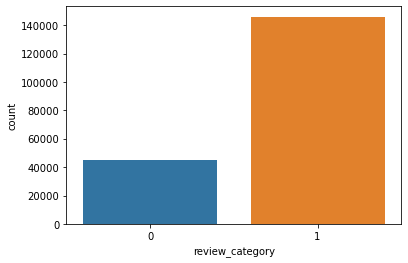

In [45]:
sns.countplot(df['review_category'])

In [46]:
# Since this is unbalanced data, we have to take 0s and 1s value differently. 

#If you want to make them equal then take the complete value of 0 and randomly asign one's value to 0. This will lead to balanced data.

#This is known as undersampling data 

In [47]:
df_0 = df.loc[df['review_category'] == 0][['review_category','reviewText']]

In [48]:
df_1 = df.loc[df['review_category'] == 1].sample(n = 45000, random_state = 123)[['review_category','reviewText']]

In [49]:
df_new = pd.concat([df_0, df_1])                    # Concatinating df_0 and df_1 as a single data or new data
df_new = df_new.sample(frac = 1, random_state = 99)       #df_new is the data of df_0 and df_1

In [50]:
df_new['review_category'].value_counts()

0    45042
1    45000
Name: review_category, dtype: int64

In [51]:
x = df_new['reviewText']
y = df_new['review_category']

In [52]:
import re

x_new = []
for w in x:
    w = re.sub('[^a-zA-Z ]','',w)  #Removing special characters & punctuation
    w = w.lower()        #Converting all text data into loercase data
    x_new.append(w) 
    

In [53]:
x_new[56]

'perfect design for my needs open port access slim profile and above average protection only gripe is i ordered the black siliconeblack tpured pc version and the picture is deceptively brighter than the actual color i had to check the box and match the product number with my order to make sure i received the right onethe case i received is dark redburgundy in color it looks more like the pictured dark charcoal gray siliconedark charcoal gray tpuplum pc case only instead of charcoal gray silicone and tpu its black maybe they put the wrong color piece in the package but you may want to keep this in mind if your considering the same color case'

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 222)

## Bag of words

In [55]:
vector = CountVectorizer(stop_words = 'english').fit(x_new)      #We are transforming after fitting 


In [56]:
x_train_vector = vector.transform(x_train)

In [57]:
#Initializing our logistic regression model
model = LogisticRegression()
model.fit(x_train_vector, y_train)



LogisticRegression()

In [58]:
predictions = model.predict(vector.transform(x_test))                #80% accuracy
print(confusion_matrix(predictions, y_test))
print(classification_report(predictions, y_test))

[[7197 1758]
 [1801 7253]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8955
           1       0.80      0.80      0.80      9054

    accuracy                           0.80     18009
   macro avg       0.80      0.80      0.80     18009
weighted avg       0.80      0.80      0.80     18009



In [59]:
print(model.predict(vector.transform(['damaged piece. Very bad service'])))

[0]


In [60]:
print(model.predict(vector.transform(['the product is amazing'])))

[1]


In [61]:
print(model.predict(vector.transform(['tatti product'])))

[0]


## Now Using Tf-IDF

In [62]:
#Semantic meaning of word

In [63]:
vector_tf = TfidfVectorizer(stop_words = 'english').fit(x_train)

In [64]:
x_train_vector_tf = vector_tf.transform(x_train)

In [65]:
model_tf = LogisticRegression()
model_tf.fit(x_train_vector_tf, y_train)

LogisticRegression()

In [66]:
#Check prediction using tfidf


predictions_tf = model_tf.predict(vector_tf.transform(x_test))
print(confusion_matrix(predictions_tf, y_test))
print(classification_report(predictions_tf, y_test))

[[7332 1678]
 [1666 7333]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9010
           1       0.81      0.81      0.81      8999

    accuracy                           0.81     18009
   macro avg       0.81      0.81      0.81     18009
weighted avg       0.81      0.81      0.81     18009



In [67]:
print(model_tf.predict(vector_tf.transform(['its almost good but bad'])))

[0]


In [68]:
print(model.predict(vector.transform(['not so good after sell services'])))    #This is a negative review but we it still showed the value one becuse of the word good in it

[1]


In [69]:
print(model.predict(vector.transform(['bad service at all'])))

[0]


In [70]:
#difference btween vector n tsidf

#vector method only counts the word

#tsifd assigns a particular meaning to word


#we can only directly use Tsifd skipping vector method

In [71]:
# train data(80%) we have to fit to over model(trainnig or fitting to model) and test data(20%) we use for model test and predictions